In [13]:
import yfinance as yf
import pandas as pd
import numpy as np

# 計算 RSI 的函數
def calculate_RSI(data, period=14):
    # 計算價格變動
    delta = data['Close'].diff(1)

    # 分別計算漲幅和跌幅
    gain = np.where(delta > 0, delta, 0)
    loss = np.where(delta < 0, -delta, 0)

    # 計算平均漲幅和平均跌幅 (Exponential Moving Average)
    avg_gain = pd.Series(gain).rolling(window=period, min_periods=1).mean()
    avg_loss = pd.Series(loss).rolling(window=period, min_periods=1).mean()

    # 避免 loss 為 0 時的除零錯誤
    rs = avg_gain / (avg_loss + 1e-10)

    # 計算 RSI
    rsi = 100 - (100 / (1 + rs))

    return rsi

# 使用 yfinance 下載台積電的數據
ticker = '2330.TW'
data = yf.download(ticker, start='2020-01-01', end='2024-01-01')

# 計算 RSI，設置為14天的頻率
data['RSI_14'] = calculate_RSI(data, period=14)

# 顯示數據
print(data[['Close', 'RSI_14']].tail())


[*********************100%***********************]  1 of 1 completed

            Close  RSI_14
Date                     
2023-12-25  581.0     NaN
2023-12-26  586.0     NaN
2023-12-27  592.0     NaN
2023-12-28  593.0     NaN
2023-12-29  593.0     NaN


In [9]:
type(data)

pandas.core.frame.DataFrame

In [19]:
import yfinance as yf
import pandas as pd
import numpy as np

# 計算 RSI 的函數
def calculate_RSI(data, period=14):
    # 計算價格變動
    delta = data['Close'].diff(1)

    # 分別計算漲幅和跌幅
    gain = np.where(delta > 0, delta, 0)
    loss = np.where(delta < 0, -delta, 0)
    
    # 將 gain 和 loss 轉為 Series 並避免初始的 NaN 值
    gain = pd.Series(gain, index=data.index)
    loss = pd.Series(loss, index=data.index)


    # 計算平均漲幅和跌幅 (Exponential Moving Average)
    avg_gain = gain.rolling(window=period, min_periods=1).mean()
    avg_loss = loss.rolling(window=period, min_periods=1).mean()

    # 避免 loss 為 0 時的除零錯誤
    rs = avg_gain / (avg_loss + 1e-10)

    # 計算 RSI
    rsi = 100 - (100 / (1 + rs))

    return rsi

# 使用 yfinance 下載台積電的數據
ticker = '2330.TW'
data = yf.download(ticker, start='2020-01-01', end='2024-01-01')

# 確保資料下載正確
if not data.empty:
    # 計算 RSI，設置為14天的頻率
    data['RSI_14'] = calculate_RSI(data, period=14)

    # 顯示數據
    print(data[['Close', 'RSI_14']].tail())
else:
    print("資料下載失敗，請檢查 ticker 代碼或日期範圍。")


[*********************100%***********************]  1 of 1 completed

            Close     RSI_14
Date                        
2023-12-25  581.0  64.102564
2023-12-26  586.0  68.181818
2023-12-27  592.0  78.260870
2023-12-28  593.0  76.744186
2023-12-29  593.0  74.358974


In [23]:
 print(data[['Close', 'RSI_14']])

            Close      RSI_14
Date                         
2020-01-02  339.0    0.000000
2020-01-03  339.5  100.000000
2020-01-06  332.0    6.250000
2020-01-07  329.5    4.761905
2020-01-08  329.5    4.761905
...           ...         ...
2023-12-25  581.0   64.102564
2023-12-26  586.0   68.181818
2023-12-27  592.0   78.260870
2023-12-28  593.0   76.744186
2023-12-29  593.0   74.358974

[973 rows x 2 columns]


[*********************100%***********************]  1 of 1 completed


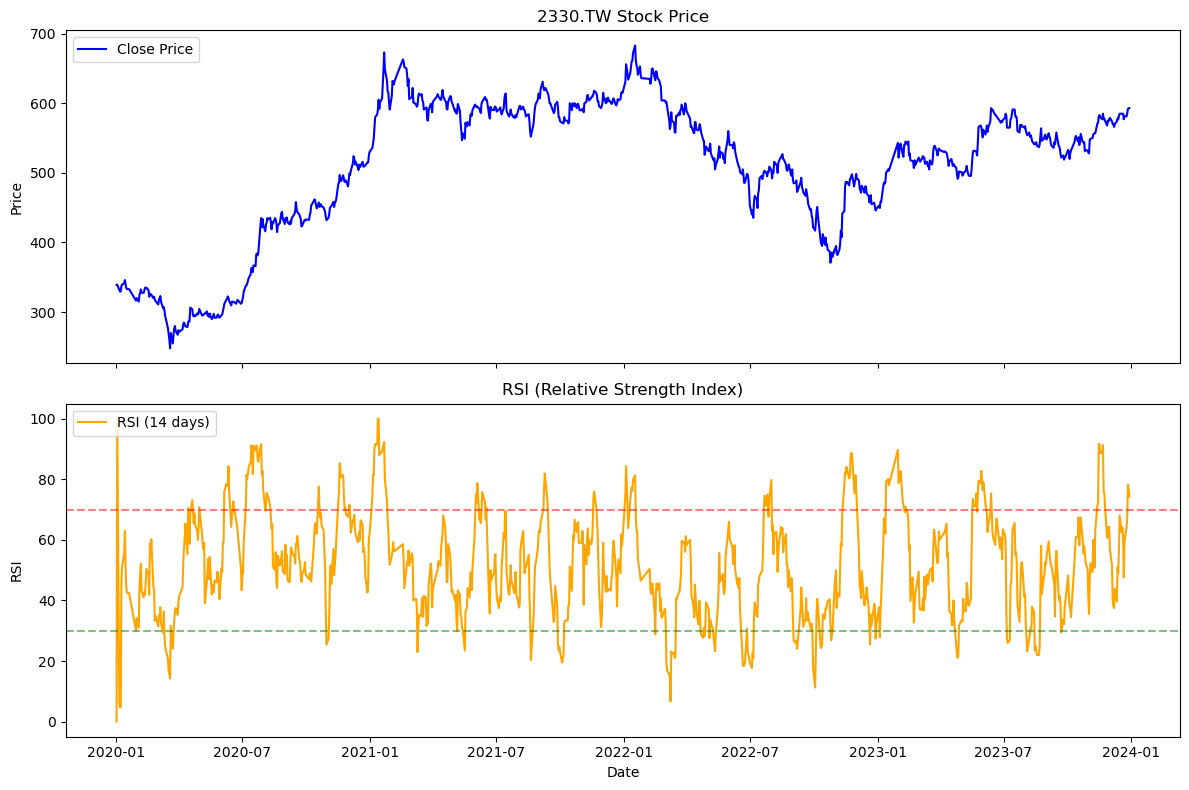

In [25]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 計算 RSI 的函數
def calculate_RSI(data, period=14):
    # 計算價格變動
    delta = data['Close'].diff(1)

    # 分別計算漲幅和跌幅
    gain = np.where(delta > 0, delta, 0)
    loss = np.where(delta < 0, -delta, 0)

    # 將 gain 和 loss 轉為 Series 並避免初始的 NaN 值
    gain = pd.Series(gain, index=data.index)
    loss = pd.Series(loss, index=data.index)

    # 計算平均漲幅和跌幅 (Exponential Moving Average)
    avg_gain = gain.rolling(window=period, min_periods=1).mean()
    avg_loss = loss.rolling(window=period, min_periods=1).mean()

    # 避免 loss 為 0 時的除零錯誤
    rs = avg_gain / (avg_loss + 1e-10)

    # 計算 RSI
    rsi = 100 - (100 / (1 + rs))

    return rsi

# 使用 yfinance 下載台積電的數據
ticker = '2330.TW'
data = yf.download(ticker, start='2020-01-01', end='2024-01-01')

# 確保資料下載正確
if not data.empty:
    # 計算 RSI，設置為14天的頻率
    data['RSI_14'] = calculate_RSI(data, period=14)

    # 創建圖表
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

    # 股票價格圖
    ax1.plot(data.index, data['Close'], label='Close Price', color='blue')
    ax1.set_title(f'{ticker} Stock Price')
    ax1.set_ylabel('Price')
    ax1.legend(loc='upper left')

    # RSI 圖
    ax2.plot(data.index, data['RSI_14'], label='RSI (14 days)', color='orange')
    ax2.axhline(70, color='red', linestyle='--', alpha=0.5)  # 超買水平
    ax2.axhline(30, color='green', linestyle='--', alpha=0.5)  # 超賣水平
    ax2.set_title('RSI (Relative Strength Index)')
    ax2.set_ylabel('RSI')
    ax2.set_xlabel('Date')
    ax2.legend(loc='upper left')

    # 顯示圖表
    plt.tight_layout()
    plt.show()
else:
    print("資料下載失敗，請檢查 ticker 代碼或日期範圍。")
